Se tienen tres líneas en $R^2$:
$$2x-y=2$$
$$x+2y=1$$
$$x+y=4$$
Con el método de mínimos cuadrados encuentre el punto común a las tres líneas. Grafique las tres líneas y el punto solución, ¿qué interpretación puede dar?

(b) Realice una búsqueda iterativa entre $$ -5 <= x <= 5 y -5 <= y <= 5$$ con un paso de h = 0.01 para encontrar la menor distancia del problema. Grafique la distancia y compare con el resultado obtenido con mínimos cuadrados.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
def GetSol(A,b):
    AT=np.dot(A.T,A)
    BT=np.dot(A.T,b)
    solucion=np.linalg.solve(AT,BT)
    
    return solucion

In [16]:
A = np.array([[2,-1],[1.,2.],[1,1]])
b = np.array([2.,1.,4.])

In [17]:
def f1(x):
    return (2*x)-2

In [41]:
def f2(x):
    return (1-x)/2

In [42]:
def f3(x):
    return 4-x

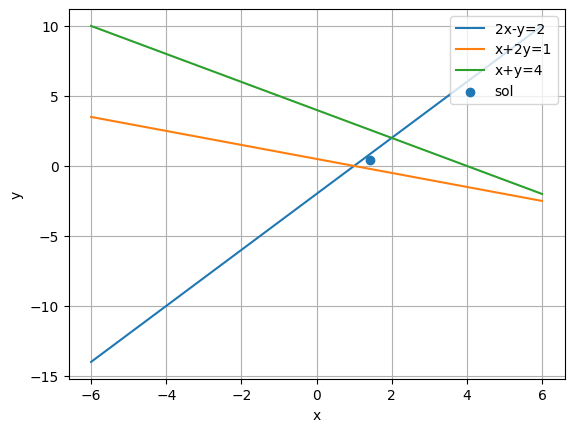

In [45]:
x = np.linspace(-6,6,100)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, [f1(i) for i in x])
plt.plot(x, [f2(i) for i in x])
plt.plot(x, [f3(i) for i in x])

sol=GetSol(A,b)
ax.scatter(sol[0],sol[1])

plt.legend(('2x-y=2', 'x+2y=1', 'x+y=4', 'sol'),
prop = {'size': 10}, loc='upper right')


plt.xlabel("x")
plt.ylabel("y")
plt.grid()

No hay punto de interseccion entre las tres lineas, dado a que el sistema lineal es inconsistente.El punto encontrado es el que minimiza la distancia euclidiana a las tres lineas

In [8]:
def Get_distance(A,b,x,y):
    X=np.array([x,y])
    point=np.dot(A,X)
    
    return np.linalg.norm(point-b)

In [9]:
h=0.01
x = np.arange(-5,5,h)
y = np.arange(-5,5,h)
X,Y = np.meshgrid(x,y)

In [10]:
d=np.zeros((len(x),len(y)))

In [11]:
for i in tqdm(range(len(x))):
    for j in range(len(y)):
        
        d[i,j]=Get_distance(A,b,X[i,j],Y[i,j])

100%|██████████| 1000/1000 [00:17<00:00, 58.46it/s]


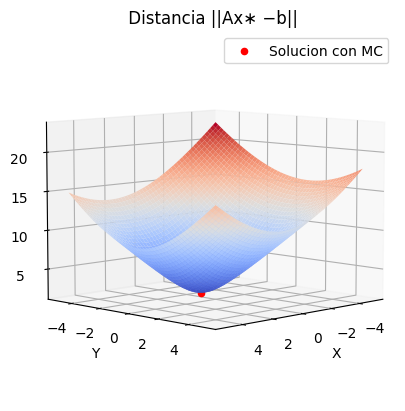

In [12]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(111,projection='3d')
ax1.plot_surface(X,Y,d,cmap="coolwarm")
ax1.set_title(label=" Distancia ||Ax∗ −b||")
zsol= np.linalg.norm(np.dot(A,sol)-b)
ax1.scatter(sol[0],sol[1],zsol,color="r",label="Solucion con MC")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("D")
ax1.legend()
ax1.view_init(elev=7, azim=45)

In [13]:
print(zsol,np.min(d))

2.5354627641855494 2.5354683985409867


Ambas soluciones son igules en sus primeras 6 cifras